## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [1]:
# load the appropriate python modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
steps = 50
#boundaries
dy = 1.
dx = 1.

#setting size of array filled with zero below
ny = 27
nx = 25

T = np.zeros((ny,nx))

#empty list
T_store = []

# Initial conditions
#slicing and dicing with array
#initial temp distribution
# we want to set it at the top wall and the bottom wall
T[0,:] = 300.
T[-1,:] = 800.
k = 1.0

# 1 timestep
# np gradient operation
time = 10.0

#loop to replace time value at a step
for i in range(1, steps):
    T[0,:] = 300.
    T[-1,:] = 800.
    #first derivative
    gradTx, gradTy = np.gradient(T, dx, dy)
   #fluxes relate to the change in a particular quantity - in this case K - spatially
    flux_x = k*gradTx
    flux_y = k*gradTy
    #second derivative
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    #adding these together - our second derivatives
    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    #calculating one step
    time += dt

    #this stores the new T being created within this for loop to the empty array
    T_store.append(T)
    #Changing of T
    T = T + dt*divT
    

Heatmap of Temperature Gradient of Given Time Variance


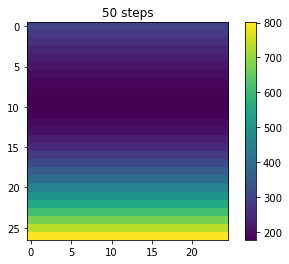

In [3]:
#Can see it still not a smooth gradient
co_bar = plt.imshow(T)
plt.colorbar(co_bar)
plt.title('50 steps')
print('Heatmap of Temperature Gradient of Given Time Variance')
pass

In [4]:
#Makes T_store into an array
T_store = np.array(T_store)

#checking shape, makes sense, in 50 steps there is 49 values (end not included), then has the dimensions
#we set above (27 rows and 25 columns)
T_store.shape

(49, 27, 25)

In [5]:
#Here setting T_diff as T_store from second T (because 0 would be 0) to last element of T, for all rows and 
#all columns MINUS T_store from first T to last entry of T, for all rows and all columns
#this substracts one step aheas
T_diff = T_store[1:,:,:1] - T_store[0:-1,:,:]

#checking shape of the data
print(T_diff.shape)

(48, 27, 25)


In [6]:
#this takes 1 value per timestep, T_diff_red is
#calculating the maximum difference between each time step
T_diff_red = np.abs(T_diff).max(axis=(1,2))

#shape has been changed, not same image data
np.max(T_diff_red)

400.0

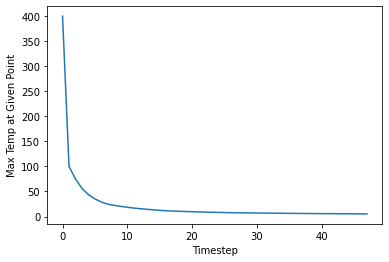

In [7]:
#plotting T_diff_red
#converges as it approaches 0
plt.plot(T_diff_red)
plt.ylabel('Max Temp at Given Point')
plt.xlabel('Timestep')
pass

Additionally, you can see that it approaches convergence pretty quickly, the equation beginning to break down after one timestep. In having 50 timesteps, and as backed up by the gradient map, you can see that the equation is beginning to create a temperature gradient, however there are too few timesteps to stabilise the state of it.

I am going to increase the number of timesteps to see how this affects the temperature gradient of the heatmap.

In [8]:
steps = 500
#boundaries
dy = 1.
dx = 1.

#setting size of array filled with zero below
ny = 27
nx = 25

T_new = np.zeros((ny,nx))

#empty list
T_store2 = []

#Initial conditions
#slicing and dicing with array
#initial temp distribution
# we want to set it at the top wall and the bottom wall
T_new[0,:] = 300.
T_new[-1,:] = 800.
k = 1.0

# 1 timestep
# np gradient operation
time = 10

#loop to replace time value at a step
for i in range(1, steps):
    T_new[0,:] = 300.
    T_new[-1,:] = 800.
    #first derivative
    gradTx, gradTy = np.gradient(T_new, dx, dy)
   #fluxes relate to the change in a particular quantity - in this case K - spatially
    flux_x = k*gradTx
    flux_y = k*gradTy
    #second derivative
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    #adding these together - our second derivatives
    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    #calculating one step
    time += dt

    #this stores the new T being created within this for loop to the empty array
    T_store2.append(T_new)
    #Changing of T
    T_new = T_new + dt*divT
    

Heatmap of Temperature Gradient of Given Time Variance


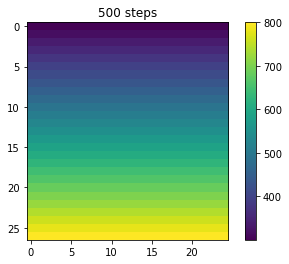

In [9]:
#Can see it is becoming smoother gradient
col_grad = plt.imshow(T_new)
plt.colorbar(col_grad)
plt.title('500 steps')
print('Heatmap of Temperature Gradient of Given Time Variance')


pass

You can see by even just increasing the steps from 50 to 500 and maintaining the stepsize at 10 that this has already smoothened out the heatmap, as now there is a smooth temperature gradient across the temperature map.

In [10]:
#Makes T_store into an array
T_store2 = np.array(T_store2)

#checking shape, makes sense, in 50 steps there is 49 values (end not included), then has the dimensions
#we set above (27 rows and 25 columns)
T_store2.shape

(499, 27, 25)

In [11]:
#Here setting T_diff as T_store from second T (because 0 would be 0) to last element of T, for all rows and 
#all columns MINUS T_store from first T to last entry of T, for all rows and all columns
#this substracts one step aheas
T_diff2 = T_store2[1:,:,:1] - T_store2[0:-1,:,:]

#checking shape of the data
print(T_diff2.shape)

(498, 27, 25)


In [12]:
#this takes 1 value per timestep, T_diff_red is
#calculating the maximum difference between each time step
T_diff_red2 = np.abs(T_diff2).max(axis=(1,2))

#shape has been changed, not same image data
np.max(T_diff_red2)

400.0

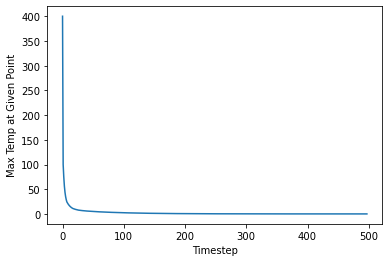

In [13]:
#plotting T_diff_red
#converges as it approaches 0
plt.plot(T_diff_red2)
plt.ylabel('Max Temp at Given Point')
plt.xlabel('Timestep')
pass

Compare this graph to the previous one for 50 timesteps, by having more timesteps, in this case I have gone up to 500, there are enough iterations that the equation is able to reach a steady state. It looks as if this has been reached around the 200 timestep mark.

Now to show that we have reached steady state by comparing the max difference in temperature solutions:

In [14]:
#This is for the first example T - 10 timestep size, 50 timesteps

T_max = T_store[48,:,:] - T_store[47,:,:]
np.max(T_max)

5.204380729367415

In [15]:
#THis is for the second example T_new - 10 timestep size, 500 timesteps
T_max2 = T_store2[498,:,:] - T_store2[497,:,:]
np.max(T_max2)

0.007071984642607276

Looking at these two values, it is clear that increasing the timestep to 500 has made it approach steady state as it is close to zero. The first example `T` with lesser timesteps (50) has a max difference in temperature solution of 5.204..., whereas the second example `T_new` with more timesteps (500) has a max difference in temperature solution of 0.00707..., much closer to zero (i.e. converges - steady state - as it approaches 0). Just for the fun of it, I wanted to run the maths for one last example.

## Next Part of Exercise

We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

In [16]:
steps = 1000
dy = 1.
dx = 1.
ny = 27
nx = 25


T = np.zeros((ny,nx))
# Initial conditions
T[0,:] = 300.
T[-1,:] = 800.

k = 1.0
time = 0.0

for i in range(1, steps):
    T[0,:] = 300.
    T[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 1.99
    #calculating one step
    
    T = T + dt * divT


In [17]:
steps = 1000
dy = 1.
dx = 1.
ny = 27
nx = 25


T2 = np.zeros((ny,nx))
# Initial conditions
T2[0,:] = 300.
T2[-1,:] = 800.

k = 1.0
time = 0.0

for i in range(1, steps):
    T2[0,:] = 300.
    T2[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(T2, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 1.999
    #calculating one step
    
    T2 = T2 + dt * divT




In [18]:
steps = 1000
dy = 1.
dx = 1.
ny = 27
nx = 25


T3 = np.zeros((ny,nx))
# Initial conditions
T3[0,:] = 300.
T3[-1,:] = 800.

k = 1.0
time = 0.0

for i in range(1, steps):
    T3[0,:] = 300.
    T3[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(T3, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 2.0
    #calculating one step
    
    T3 = T3 + dt * divT



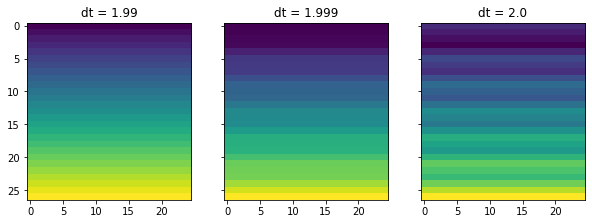

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax1.set_title('dt = 1.99')
ax2.imshow(T2)
ax2.set_title('dt = 1.999')
ax3.imshow(T3)
ax3.set_title('dt = 2.0')
pass

Playing around with the dt value, somewhere between 1.998 and 1.999 the solution begins to breakdown, wild oscilations starting for sure at dt=2.

The values of dx, dy and k produce dt. Let's test what dt is given the values for dx, dy and have all been set at 1. When I plug these into the equation I get:

In [20]:
#these values are constant in testing for smooth temp gradient, all = 1
dt = dx*dy/k
print(dt)

1.0


Using the values for dx, dy and k I have set (all = 1), when I plug these into the equation

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$

I get 1. However, by playing around with dt by manually overwriting the value as seen above dt = 199 to 1.999 is where oscillations occur.

While 1 and 1.99 are not far from each other, given that between 1.99 and 1.999 (far smaller difference) makes all the difference to the temperature gradient, I guess optimal timestep size is close to the equation, but not close enough. 

In [21]:
#testing dt = 1 in the temperature solution

steps = 1000
dy = 1.
dx = 1.
ny = 27
nx = 25


T_testing = np.zeros((ny,nx))
# Initial conditions
T_testing[0,:] = 300.
T_testing[-1,:] = 800.

k = 1.0
time = 0.0

for i in range(1, steps):
    T_testing[0,:] = 300.
    T_testing[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(T_testing, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy

    #calculating one step
    
    T_testing = T_testing + dt * divT



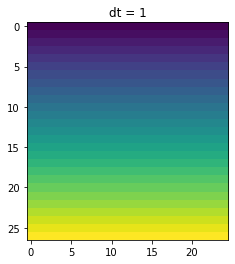

In [22]:
#plotting T_diff_red
#converges as it approaches 0
plt.imshow(T_testing)
plt.title('dt = 1')
pass

Using dt = 1 from the equation there is a smooth gradient - there are no oscillations yet, the solution is still stable and is not breaking down. this means that this is still a suitably small dt for the equation.

I will now set increments and see what will happen if I increase and decrease dt by the increment.

In [23]:
steps = 1000
dx = 1
dy = 1
ny = 27
nx = 25


New_T = np.zeros((ny,nx))
# Initial conditions
New_T[0,:] = 300.
New_T[-1,:] = 800.

k = 1.0
time = 0.0
inc = .9975

for i in range(1, steps):
    New_T[0,:] = 300.
    New_T[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(New_T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt_new = dt + inc
    #calculating one step
    
    New_T = New_T + dt_new * divT


In [24]:
steps = 1000
dx = 1
dy = 1
ny = 27
nx = 25


Newer_T = np.zeros((ny,nx))
# Initial conditions
Newer_T[0,:] = 300.
Newer_T[-1,:] = 800.

k = 1.0
time = 0.0
inc = .999

for i in range(1, steps):
    Newer_T[0,:] = 300.
    Newer_T[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(Newer_T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt_newer = dt + inc
    #calculating one step
    
    Newer_T = Newer_T + dt_newer * divT



In [25]:
steps = 1000
dx = 1
dy = 1
ny = 27
nx = 25


N_T = np.zeros((ny,nx))
# Initial conditions
N_T[0,:] = 300.
N_T[-1,:] = 800.

k = 1.0
time = 0.0
inc = -0.1

for i in range(1, steps):
    N_T[0,:] = 300.
    N_T[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(N_T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt_n = dt + inc
    #calculating one step
    
    N_T = N_T + dt_n * divT

In [26]:
steps = 1000
dx = 1
dy = 1
ny = 27
nx = 25


N_Tn = np.zeros((ny,nx))
# Initial conditions
N_Tn[0,:] = 300.
N_Tn[-1,:] = 800.

k = 1.0
time = 0.0
inc = -0.3

for i in range(1, steps):
    N_Tn[0,:] = 300.
    N_Tn[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(N_Tn, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt_nt = dt + inc
    #calculating one step
    
    N_Tn = N_Tn + dt_nt * divT


dt = 1 + some specified increment (inc)


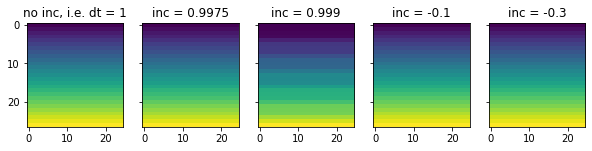

In [27]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax1.set_title('no inc, i.e. dt = 1')
ax2.imshow(New_T)
ax2.set_title('inc = 0.9975')
ax3.imshow(Newer_T)
ax3.set_title('inc = 0.999')
ax4.imshow(N_T)
ax4.set_title('inc = -0.1')
ax5.imshow(N_Tn)
ax5.set_title('inc = -0.3')
print()
print('dt = 1 + some specified increment (inc)')
pass

When the increment is added to rewrite dt, it performs the same way as previously shown:

<ul>
<li>in the case of inc = 0.9975, dt becomes 1.9975 which is the boundary (1.99 to 1.999) of where the solution begins to breakdown</li>
<li>in the case of inc = 0.999, dt becomes 1.999 which is where oscillations are clear and the solution is beginning to breakdown.</li>
<li>where dt is decreased by 0.1 and 0.3, the solution remains stable. </li>
</ul>
    
The reason the solution becomes unstable by increasing dt is because a larger dt causes instabilities in the solution. The reason the solution remains stable by decreasing dt is because a smaller dt is desired to maintain stability of the solution.